In [1]:
import os
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier, XGBRFClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from xgboost import XGBClassifier
import lightgbm as lgb
import seaborn as sns
from sklearn.ensemble import *
from catboost import CatBoostClassifier
import numpy as np
import itertools
import shap
import joblib

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir('..')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_csv('artifacts/data_transformation/train.csv')

In [5]:
df = df.loc[:, ~df.columns.str.startswith('NATURE')]

In [6]:
df.head()

,ACC_NO,MIN_DUE_AMT_1,MIN_DUE_AMT_2,MIN_DUE_AMT_3,MIN_DUE_AMT_4,MIN_DUE_AMT_5,MIN_DUE_AMT_6,OVER_LIMIT_FEE_1,OVER_LIMIT_FEE_2,OVER_LIMIT_FEE_3,OVER_LIMIT_FEE_4,OVER_LIMIT_FEE_5,OVER_LIMIT_FEE_6,TOT_SPEND_AMT_1,TOT_SPEND_AMT_2,TOT_SPEND_AMT_3,TOT_SPEND_AMT_4,TOT_SPEND_AMT_5,TOT_SPEND_AMT_6,PAYMENT_AMT_1,PAYMENT_AMT_2,PAYMENT_AMT_3,PAYMENT_AMT_4,PAYMENT_AMT_5,PAYMENT_AMT_6,TOTAL_OS_1,TOTAL_OS_2,TOTAL_OS_3,TOTAL_OS_4,TOTAL_OS_5,TOTAL_OS_6,LATE_PAY_FEE_1,LATE_PAY_FEE_2,LATE_PAY_FEE_3,LATE_PAY_FEE_4,LATE_PAY_FEE_5,LATE_PAY_FEE_6,A_SCORE_VALUE,FINAL_LIMIT,3_MONTH_NPL_STATUS,AGE,MONTH_END_BAL_LCY,REV_SETT_1_REVOLVER,REV_SETT_1_SETTLER,REV_SETT_2_REVOLVER,REV_SETT_2_SETTLER,REV_SETT_3_REVOLVER,REV_SETT_3_SETTLER,REV_SETT_4_REVOLVER,REV_SETT_4_SETTLER,REV_SETT_5_REVOLVER,REV_SETT_5_SETTLER,REV_SETT_6_REVOLVER,REV_SETT_6_SETTLER,RESTRUCTURED_PLAN_N,RESTRUCTURED_PLAN_Y,ST_GENERAL_ACC_BLCK,ST_GENERAL_ACC_CLST,ST_GENERAL_ACC_DACL,ST_GENERAL_ACC_DCBK,ST_GENERAL_ACC_DLNQ,ST_GENERAL_ACC_DRSP,ST_GENERAL_ACC_NORM,ST_GENERAL_ACC_PCLS,ST_GENERAL_ACC_RCDF,ST_GENERAL_ACC_RCLS,ST_GENERAL_ACC_RCPM,ST_GENERAL_ACC_RCSM,ST_GENERAL_ACC_RCSS,ST_GENERAL_ACC_RSET,ST_GENERAL_ACC_SACC,ST_GENERAL_ACC_SETT,ST_GENERAL_ACC_TERM,ST_GENERAL_ACC_WROF,GENDER_F,GENDER_M,PRODUCT_P13635,PRODUCT_P2f44d,PRODUCT_P3c2a4,PRODUCT_P3dbc4,PRODUCT_P59e14,PRODUCT_P78a55,PRODUCT_P7fc9a,PRODUCT_P8f4b3,PRODUCT_Pacee4,PRODUCT_Pd9c22,PRODUCT_Pdbb26,PRODUCT_Pdc921,PRODUCT_Pf4d80
0,93944.0,542.70,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,12896.00,78185.72,16409.23,9008.00,0.00,0.00,3000.0,0.0,42000.0,3000.0,1000.0,2000.0,137387.06,125209.110,46277.59,65720.36,59712.36,60712.36,1750.0,0.0,0.0,0.0,0.0,0.0,194.0,317000.0,0.0,56.0,397.13,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7238.0,7798.39,4076.19,2045.47,1551.43,7527.77,887.62,0.0,0.0,0.0,0.0,0.0,0.0,79873.03,67408.22,165612.27,87593.55,42954.06,179232.44,195000.0,51500.0,52000.0,39000.0,188200.0,22500.0,140000.80,255127.770,232021.77,117428.98,68785.43,213981.38,0.0,0.0,1750.0,0.0,0.0,0.0,217.0,1000000.0,0.0,35.0,0.00,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11226.0,0.00,0.00,0.00,0.00,0.00,250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-76.31,-76.310,-76.31,-76.31,-76.31,-76.31,0.0,0.0,0.0,0.0,0.0,0.0,231.0,1037000.0,0.0,55.0,0.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,94712.0,818.80,650.04,579.68,830.91,577.58,636.81,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1739.70,0.00,0.00,6314.00,13000.0,20500.0,16300.0,14500.0,20800.0,14500.0,97219.38,110219.375,130469.38,139029.67,153529.69,174329.67,0.0,0.0,0.0,0.0,0.0,0.0,233.0,500000.0,0.0,37.0,0.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,119466.0,570.24,618.13,602.91,250.00,250.00,250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,42779.00,8278.68,17041.09,2238.00,0.00,15000.0,15500.0,16200.0,5500.0,3500.0,3500.0,97667.70,112667.700,85388.70,93310.02,81768.93,83030.93,0.0,0.0,0.0,0.0,0.0,1750.0,201.0,376000.0,0.0,56.0,0.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_1=df.copy()

In [8]:
df_1['LATE_PAY_FEE']=df_1['LATE_PAY_FEE_1']+df_1['LATE_PAY_FEE_2']+df_1['LATE_PAY_FEE_3']+df_1['LATE_PAY_FEE_4']+df_1['LATE_PAY_FEE_5']+df_1['LATE_PAY_FEE_6']


df_1['OVER_LIMIT_FEE']=df_1['OVER_LIMIT_FEE_1']+df_1['OVER_LIMIT_FEE_2']+df_1['OVER_LIMIT_FEE_3']+df_1['OVER_LIMIT_FEE_4']+df_1['OVER_LIMIT_FEE_5']+df_1['OVER_LIMIT_FEE_6']

In [9]:
df_1=df_1.drop(columns=['LATE_PAY_FEE_1','LATE_PAY_FEE_2','LATE_PAY_FEE_3','LATE_PAY_FEE_4','LATE_PAY_FEE_5','LATE_PAY_FEE_6'])

df_1=df_1.drop(columns=['OVER_LIMIT_FEE_1','OVER_LIMIT_FEE_2','OVER_LIMIT_FEE_3','OVER_LIMIT_FEE_4','OVER_LIMIT_FEE_5','OVER_LIMIT_FEE_6'])

In [10]:
df_2=df_1.copy()

df_2=df_2.drop(columns=['A_SCORE_VALUE'])

In [11]:
df_3=df_2.copy()

df_3['TOTAL_OS']=(df_3['TOTAL_OS_1']+df_3['TOTAL_OS_2']+df_3['TOTAL_OS_3']+df_3['TOTAL_OS_4']+df_3['TOTAL_OS_5']+df_3['TOTAL_OS_6'])/6

df_3=df_3.drop(columns=['TOTAL_OS_1','TOTAL_OS_2','TOTAL_OS_3','TOTAL_OS_4','TOTAL_OS_5','TOTAL_OS_6'])

In [12]:

spend_columns = ['TOT_SPEND_AMT_1', 'TOT_SPEND_AMT_2', 'TOT_SPEND_AMT_3', 'TOT_SPEND_AMT_4', 'TOT_SPEND_AMT_5', 'TOT_SPEND_AMT_6']
df_3_spend = df_3[spend_columns]

pay_columns = ['PAYMENT_AMT_1', 'PAYMENT_AMT_2', 'PAYMENT_AMT_3', 'PAYMENT_AMT_4', 'PAYMENT_AMT_5', 'PAYMENT_AMT_6']
df_3_pay = df_3[pay_columns]

settler_columns = ['REV_SETT_1_SETTLER', 'REV_SETT_2_SETTLER', 'REV_SETT_3_SETTLER', 'REV_SETT_4_SETTLER', 'REV_SETT_5_SETTLER', 'REV_SETT_6_SETTLER']
df_3_set = df_3[settler_columns]

revolver_columns = ['REV_SETT_1_REVOLVER', 'REV_SETT_2_REVOLVER', 'REV_SETT_3_REVOLVER', 'REV_SETT_4_REVOLVER', 'REV_SETT_5_REVOLVER', 'REV_SETT_6_REVOLVER']
df_3_rev = df_3[revolver_columns]

df_3['SPENDING_MONTHS'] = (df_3_spend>0).sum(axis=1)
df_3['PAYMENT_MONTHS'] = (df_3_pay>0).sum(axis=1)
#df_3['SETTLER_MONTHS'] = (df_3_set>0).sum(axis=1)

In [13]:
df_3['MONTHS_SINCE_LAST_SPEND'] = df_3_spend.gt(0).idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]) - 1)
df_3['MONTHS_SINCE_LAST_SPEND'] = df_3['MONTHS_SINCE_LAST_SPEND'].where(df_3_spend.gt(0).any(axis=1), len(spend_columns))

In [14]:
df_3['MONTHS_SINCE_LAST_PAY'] = df_3_pay.gt(0).idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]) - 1)
df_3['MONTHS_SINCE_LAST_PAY'] = df_3['MONTHS_SINCE_LAST_PAY'].where(df_3_pay.gt(0).any(axis=1), len(pay_columns))

In [15]:
df_3['MONTHS_SINCE_LAST_SETTLER'] = df_3_set.gt(0).idxmax(axis=1).apply(lambda x: int(x.split('_')[2]) - 1)
df_3['MONTHS_SINCE_LAST_SETTLER'] = df_3['MONTHS_SINCE_LAST_SETTLER'].where(df_3_set.gt(0).any(axis=1), len(settler_columns))

In [16]:
df_3['MONTHS_SINCE_LAST_REVOLVER'] = df_3_rev.gt(0).idxmax(axis=1).apply(lambda x: int(x.split('_')[2]) - 1)
df_3['MONTHS_SINCE_LAST_REVOLVER'] = df_3['MONTHS_SINCE_LAST_REVOLVER'].where(df_3_rev.gt(0).any(axis=1), len(revolver_columns))

In [17]:
df_3.head()

,ACC_NO,MIN_DUE_AMT_1,MIN_DUE_AMT_2,MIN_DUE_AMT_3,MIN_DUE_AMT_4,MIN_DUE_AMT_5,MIN_DUE_AMT_6,TOT_SPEND_AMT_1,TOT_SPEND_AMT_2,TOT_SPEND_AMT_3,TOT_SPEND_AMT_4,TOT_SPEND_AMT_5,TOT_SPEND_AMT_6,PAYMENT_AMT_1,PAYMENT_AMT_2,PAYMENT_AMT_3,PAYMENT_AMT_4,PAYMENT_AMT_5,PAYMENT_AMT_6,FINAL_LIMIT,3_MONTH_NPL_STATUS,AGE,MONTH_END_BAL_LCY,REV_SETT_1_REVOLVER,REV_SETT_1_SETTLER,REV_SETT_2_REVOLVER,REV_SETT_2_SETTLER,REV_SETT_3_REVOLVER,REV_SETT_3_SETTLER,REV_SETT_4_REVOLVER,REV_SETT_4_SETTLER,REV_SETT_5_REVOLVER,REV_SETT_5_SETTLER,REV_SETT_6_REVOLVER,REV_SETT_6_SETTLER,RESTRUCTURED_PLAN_N,RESTRUCTURED_PLAN_Y,ST_GENERAL_ACC_BLCK,ST_GENERAL_ACC_CLST,ST_GENERAL_ACC_DACL,ST_GENERAL_ACC_DCBK,ST_GENERAL_ACC_DLNQ,ST_GENERAL_ACC_DRSP,ST_GENERAL_ACC_NORM,ST_GENERAL_ACC_PCLS,ST_GENERAL_ACC_RCDF,ST_GENERAL_ACC_RCLS,ST_GENERAL_ACC_RCPM,ST_GENERAL_ACC_RCSM,ST_GENERAL_ACC_RCSS,ST_GENERAL_ACC_RSET,ST_GENERAL_ACC_SACC,ST_GENERAL_ACC_SETT,ST_GENERAL_ACC_TERM,ST_GENERAL_ACC_WROF,GENDER_F,GENDER_M,PRODUCT_P13635,PRODUCT_P2f44d,PRODUCT_P3c2a4,PRODUCT_P3dbc4,PRODUCT_P59e14,PRODUCT_P78a55,PRODUCT_P7fc9a,PRODUCT_P8f4b3,PRODUCT_Pacee4,PRODUCT_Pd9c22,PRODUCT_Pdbb26,PRODUCT_Pdc921,PRODUCT_Pf4d80,LATE_PAY_FEE,OVER_LIMIT_FEE,TOTAL_OS,SPENDING_MONTHS,PAYMENT_MONTHS,MONTHS_SINCE_LAST_SPEND,MONTHS_SINCE_LAST_PAY,MONTHS_SINCE_LAST_SETTLER,MONTHS_SINCE_LAST_REVOLVER
0,93944.0,542.70,0.00,0.00,0.00,0.00,0.00,12896.00,78185.72,16409.23,9008.00,0.00,0.00,3000.0,0.0,42000.0,3000.0,1000.0,2000.0,317000.0,0.0,56.0,397.13,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750.0,0.0,82503.140000,4,5,0,0,1,0
1,7238.0,7798.39,4076.19,2045.47,1551.43,7527.77,887.62,79873.03,67408.22,165612.27,87593.55,42954.06,179232.44,195000.0,51500.0,52000.0,39000.0,188200.0,22500.0,1000000.0,0.0,35.0,0.00,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750.0,0.0,171224.355000,6,6,0,0,0,1
2,11226.0,0.00,0.00,0.00,0.00,0.00,250.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1037000.0,0.0,55.0,0.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-76.310000,0,0,6,6,0,6
3,94712.0,818.80,650.04,579.68,830.91,577.58,636.81,0.00,0.00,1739.70,0.00,0.00,6314.00,13000.0,20500.0,16300.0,14500.0,20800.0,14500.0,500000.0,0.0,37.0,0.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134132.860833,2,6,2,0,0,6
4,119466.0,570.24,618.13,602.91,250.00,250.00,250.00,0.00,42779.00,8278.68,17041.09,2238.00,0.00,15000.0,15500.0,16200.0,5500.0,3500.0,3500.0,376000.0,0.0,56.0,0.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750.0,0.0,92305.663333,4,6,1,0,0,5


In [18]:
df1=df_3.drop(columns=['ACC_NO'])

In [19]:
x=df1.drop(columns=['3_MONTH_NPL_STATUS'])
y=df1.loc[:,['3_MONTH_NPL_STATUS']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y,shuffle=True,random_state=42)

In [21]:
params_check = {
    'boosting_type': 'dart',
    'objective': 'binary',
    'scale_pos_weight': 120,
    'learning_rate': 0.05,
    'min_child_weight': 25,
    'num_leaves':100,
    'max_depth':31,
    'subsample':0.5,
    'colsample_bytree':0.3,
    'verbosity': -1,
    'n_estimators': 1000,
    'seed': 42
}

In [22]:
params_check_catboost = {
    'loss_function': 'Logloss',  # Corresponds to 'binary' objective in LGBM
    'custom_metric': 'AUC',  # You can specify AUC or other metrics if needed
    'learning_rate': 0.05,
    'depth': 10,  # For CatBoost, depth is like max_depth in LGBM
    'iterations': 1000,  # n_estimators in LGBM
    'subsample': 0.5,  # Corresponds to LGBM's subsample
    'rsm': 0.3,  # This is equivalent to colsample_bytree in LGBM
    'l2_leaf_reg': 25,  # Corresponds to min_child_weight in LGBM
    'scale_pos_weight': 120,  # This will directly map for imbalanced classes
    'thread_count': -1,  # Automatically use all available CPU threads
    'random_seed': 42,  # Same as LGBM seed
    'boosting_type': 'Ordered',  # Corresponds to LGBM's boosting type; 'Ordered' is the default CatBoost equivalent
    'verbose': False,  # Equivalent to verbosity = -1 in LGBM
}


clf_cat = CatBoostClassifier(**params_check_catboost,
                               task_type='CPU')

clf_cat.fit(X_train,y_train)

In [25]:
clf_xgb = XGBClassifier(**params2)
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=[True], eta=0.05, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=31,
              max_leaves=100, min_child_weight=25, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [22]:
clf_lgb = lgb.LGBMClassifier(**params_check)

clf_lgb.fit(X_train,y_train)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


LGBMClassifier(boosting_type='dart', colsample_bytree=0.3, learning_rate=0.05,
               max_depth=31, min_child_weight=25, n_estimators=1000,
               num_leaves=100, objective='binary', scale_pos_weight=120,
               seed=42, subsample=0.5, verbosity=-1)

In [28]:
lgb_pred = clf_xgb.predict(X_test)
lgb_pred_prob = clf_xgb.predict_proba(X_test)

In [23]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    print('----------------------------------------------\n')
    
    print('Train F1: {:.2f}%'.format(f1_score(y_train, train_pred) * 100))
    print('Train Precision (Class 1): {:.2f}%'.format(precision_score(y_train, train_pred) * 100))
    print('Train Recall (Class 0): {:.2f}%'.format(recall_score(y_train, train_pred,pos_label=0) * 100))
    print('Train Recall: {:.2f}%'.format(recall_score(y_train, train_pred) * 100))
    
    print('----------------------------------------------\n')
    
    conf_matrix_xgb = confusion_matrix(y_train,train_pred)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('\n----------------------------------------------\n')
    test_pred = model.predict(X_test)

    
    print('Test F1: {:.2f}%'.format(f1_score(y_test, test_pred) * 100))
    print('Test Precision (Class 1): {:.2f}%'.format(precision_score(y_test, test_pred) * 100))
    print('Test Recall (Class 0): {:.2f}%'.format(recall_score(y_test, test_pred,pos_label=0) * 100))
    print('Test Recall: {:.2f}%'.format(recall_score(y_test, test_pred) * 100))
    
    print('----------------------------------------------\n')
    
    
    conf_matrix_xgb = confusion_matrix(y_test,test_pred)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='d', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

----------------------------------------------

Train F1: 9.54%
Train Precision (Class 1): 5.03%
Train Recall (Class 0): 92.26%
Train Recall: 91.80%
----------------------------------------------



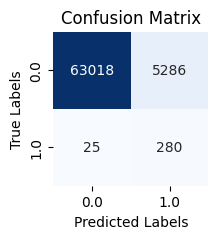


----------------------------------------------

Test F1: 7.67%
Test Precision (Class 1): 4.05%
Test Recall (Class 0): 92.14%
Test Recall: 74.05%
----------------------------------------------



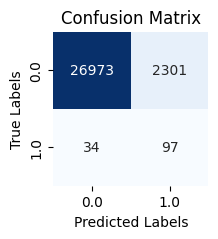

In [24]:
evaluate_model(clf_cat,X_train,y_train,X_test,y_test)

----------------------------------------------

Train F1: 87.14%
Train Precision (Class 1): 77.22%
Train Recall (Class 0): 99.87%
Train Recall: 100.00%
----------------------------------------------



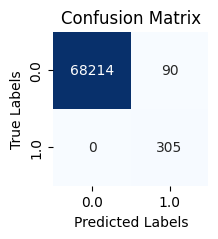


----------------------------------------------

Test F1: 28.57%
Test Precision (Class 1): 30.70%
Test Recall (Class 0): 99.73%
Test Recall: 26.72%
----------------------------------------------



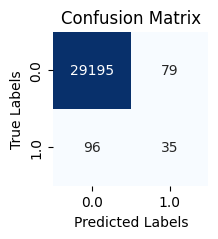

In [ ]:
evaluate_model(clf_xgb,X_train,y_train,X_test,y_test)

In [37]:
lgb_ta=(lgb_pred_prob[:,1]>=0.5).astype(int)


In [38]:
print('AUC: {:.2f}%'.format(roc_auc_score(y_test, lgb_ta) * 100))
print('F1: {:.2f}%'.format(f1_score(y_test, lgb_ta) * 100))
print('Precision (Class 1): {:.2f}%'.format(precision_score(y_test, lgb_ta) * 100))
print('Recall (Class 0): {:.2f}%'.format(recall_score(y_test, lgb_ta,pos_label=0) * 100))
print('Recall: {:.2f}%'.format(recall_score(y_test, lgb_ta) * 100))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, lgb_ta) * 100))

AUC: 58.65%
F1: 20.26%
Precision (Class 1): 23.96%
Recall (Class 0): 99.75%
Recall: 17.56%
Accuracy: 99.38%


In [98]:
conf_matrix_xgb = confusion_matrix(y_test,lgb_ta)
conf_matrix_xgb

array([[29195,    79],
       [   96,    35]], dtype=int64)